# Unsupervised Learning Assignment

# The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

# Importing All Libraries

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding & Exploration:

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

In [337]:
df1 = pd.read_csv('Car name.csv')

In [338]:
df1

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

In [339]:
df2 = pd.read_json('Car-Attributes.json')

In [340]:
df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [341]:
df1.shape

(398, 1)

In [342]:
df2.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

C. Merge both the DataFrames together to form a single DataFrame

In [343]:
df = pd.concat([df1, df2], axis = 1)

D. Print 5 point summary of the numerical features and share insights. 

In [344]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# 2. Data Preparation & Analysis:

A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach

In [347]:
df.isna().sum()/len(df)*100

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

B. Check for duplicate values in the data and impute with the best suitable approach. 

In [439]:
df.duplicated().sum()

0

We can see that there are no duplicates present in the data.

C. Plot a pairplot for all features

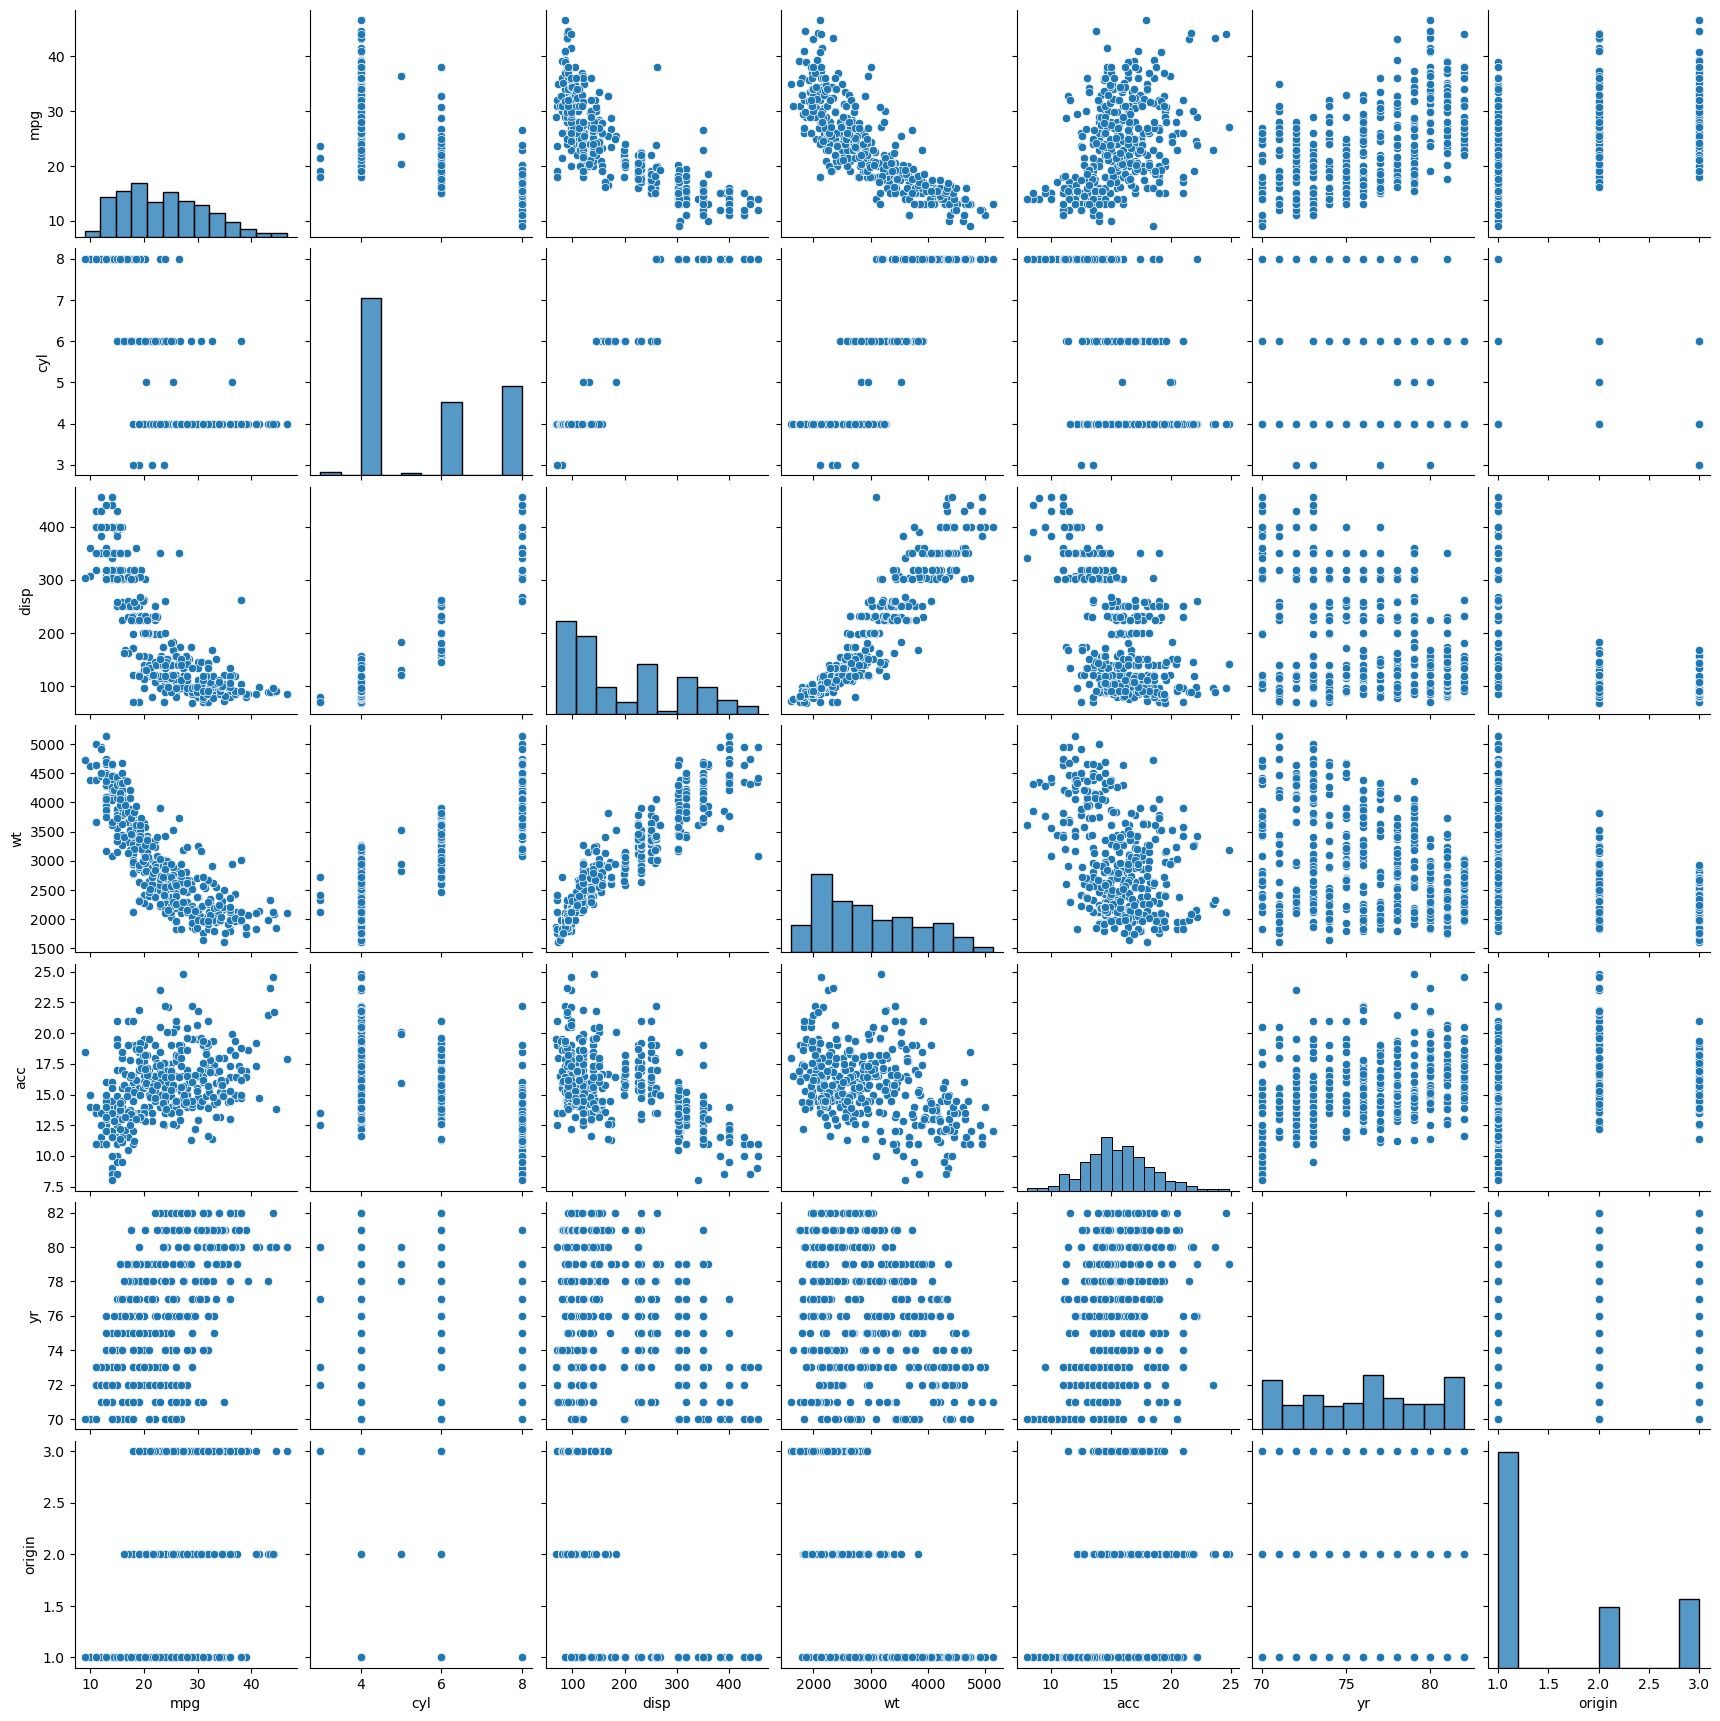

In [349]:
sns.pairplot(df)

D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’

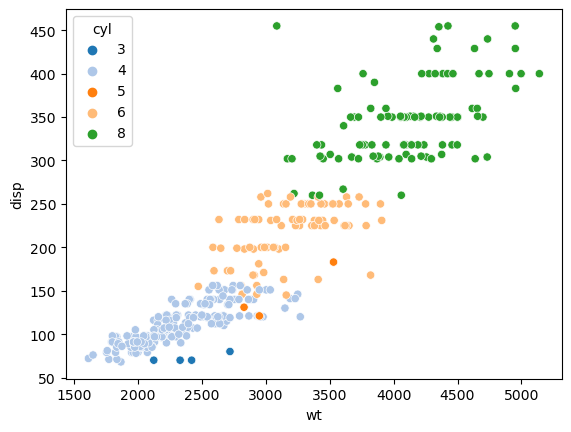

In [120]:
sns.scatterplot(data=df, x="wt", y="disp",hue='cyl',palette = 'tab20');

E. Share insights for Q2.d.

1. 'wt' is having positive correlation with cylinder displacement.
2. 'wt' and cylinder displacement is increasing along with increase in Number of Cylinders.
3. There are more vehicles with 4 cylinders and 8 cylinders than 3,5 & 6

F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’

<Axes: xlabel='wt', ylabel='mpg'>

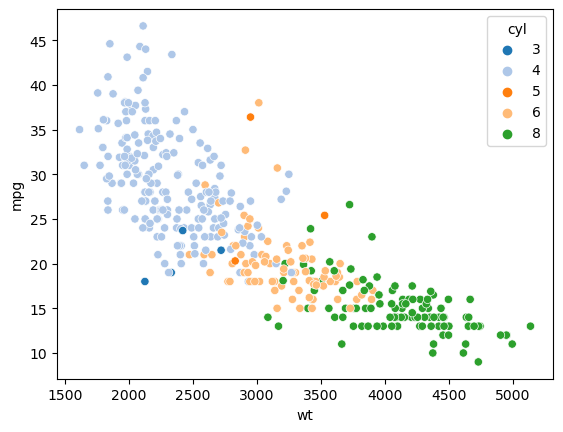

In [350]:
sns.scatterplot(x = df['wt'], y = df['mpg'], hue=df['cyl'], palette='tab20')

G. Share insights for Q2.f. 

1. As wt increases, MPG decreases. 
2. MPG decreases with increased number of cylinders.

H. Check for unexpected values in all the features and datapoints with such values.

In [351]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(df.hp.str.isdigit()) 

#print isDigit = False!
df[hpIsDigit['hp'] == False]  

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [352]:
df = df.replace('?', np.nan)
df[hpIsDigit['hp'] == False] 

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [353]:
df.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [354]:
df.dropna(inplace=True)

In [355]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    float64
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


# 3. Clustering

A. Apply K-Means clustering for 2 to 10 clusters.

In [357]:
X = df.drop('car_name',axis=1)

In [358]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   disp    392 non-null    float64
 3   hp      392 non-null    float64
 4   wt      392 non-null    int64  
 5   acc     392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


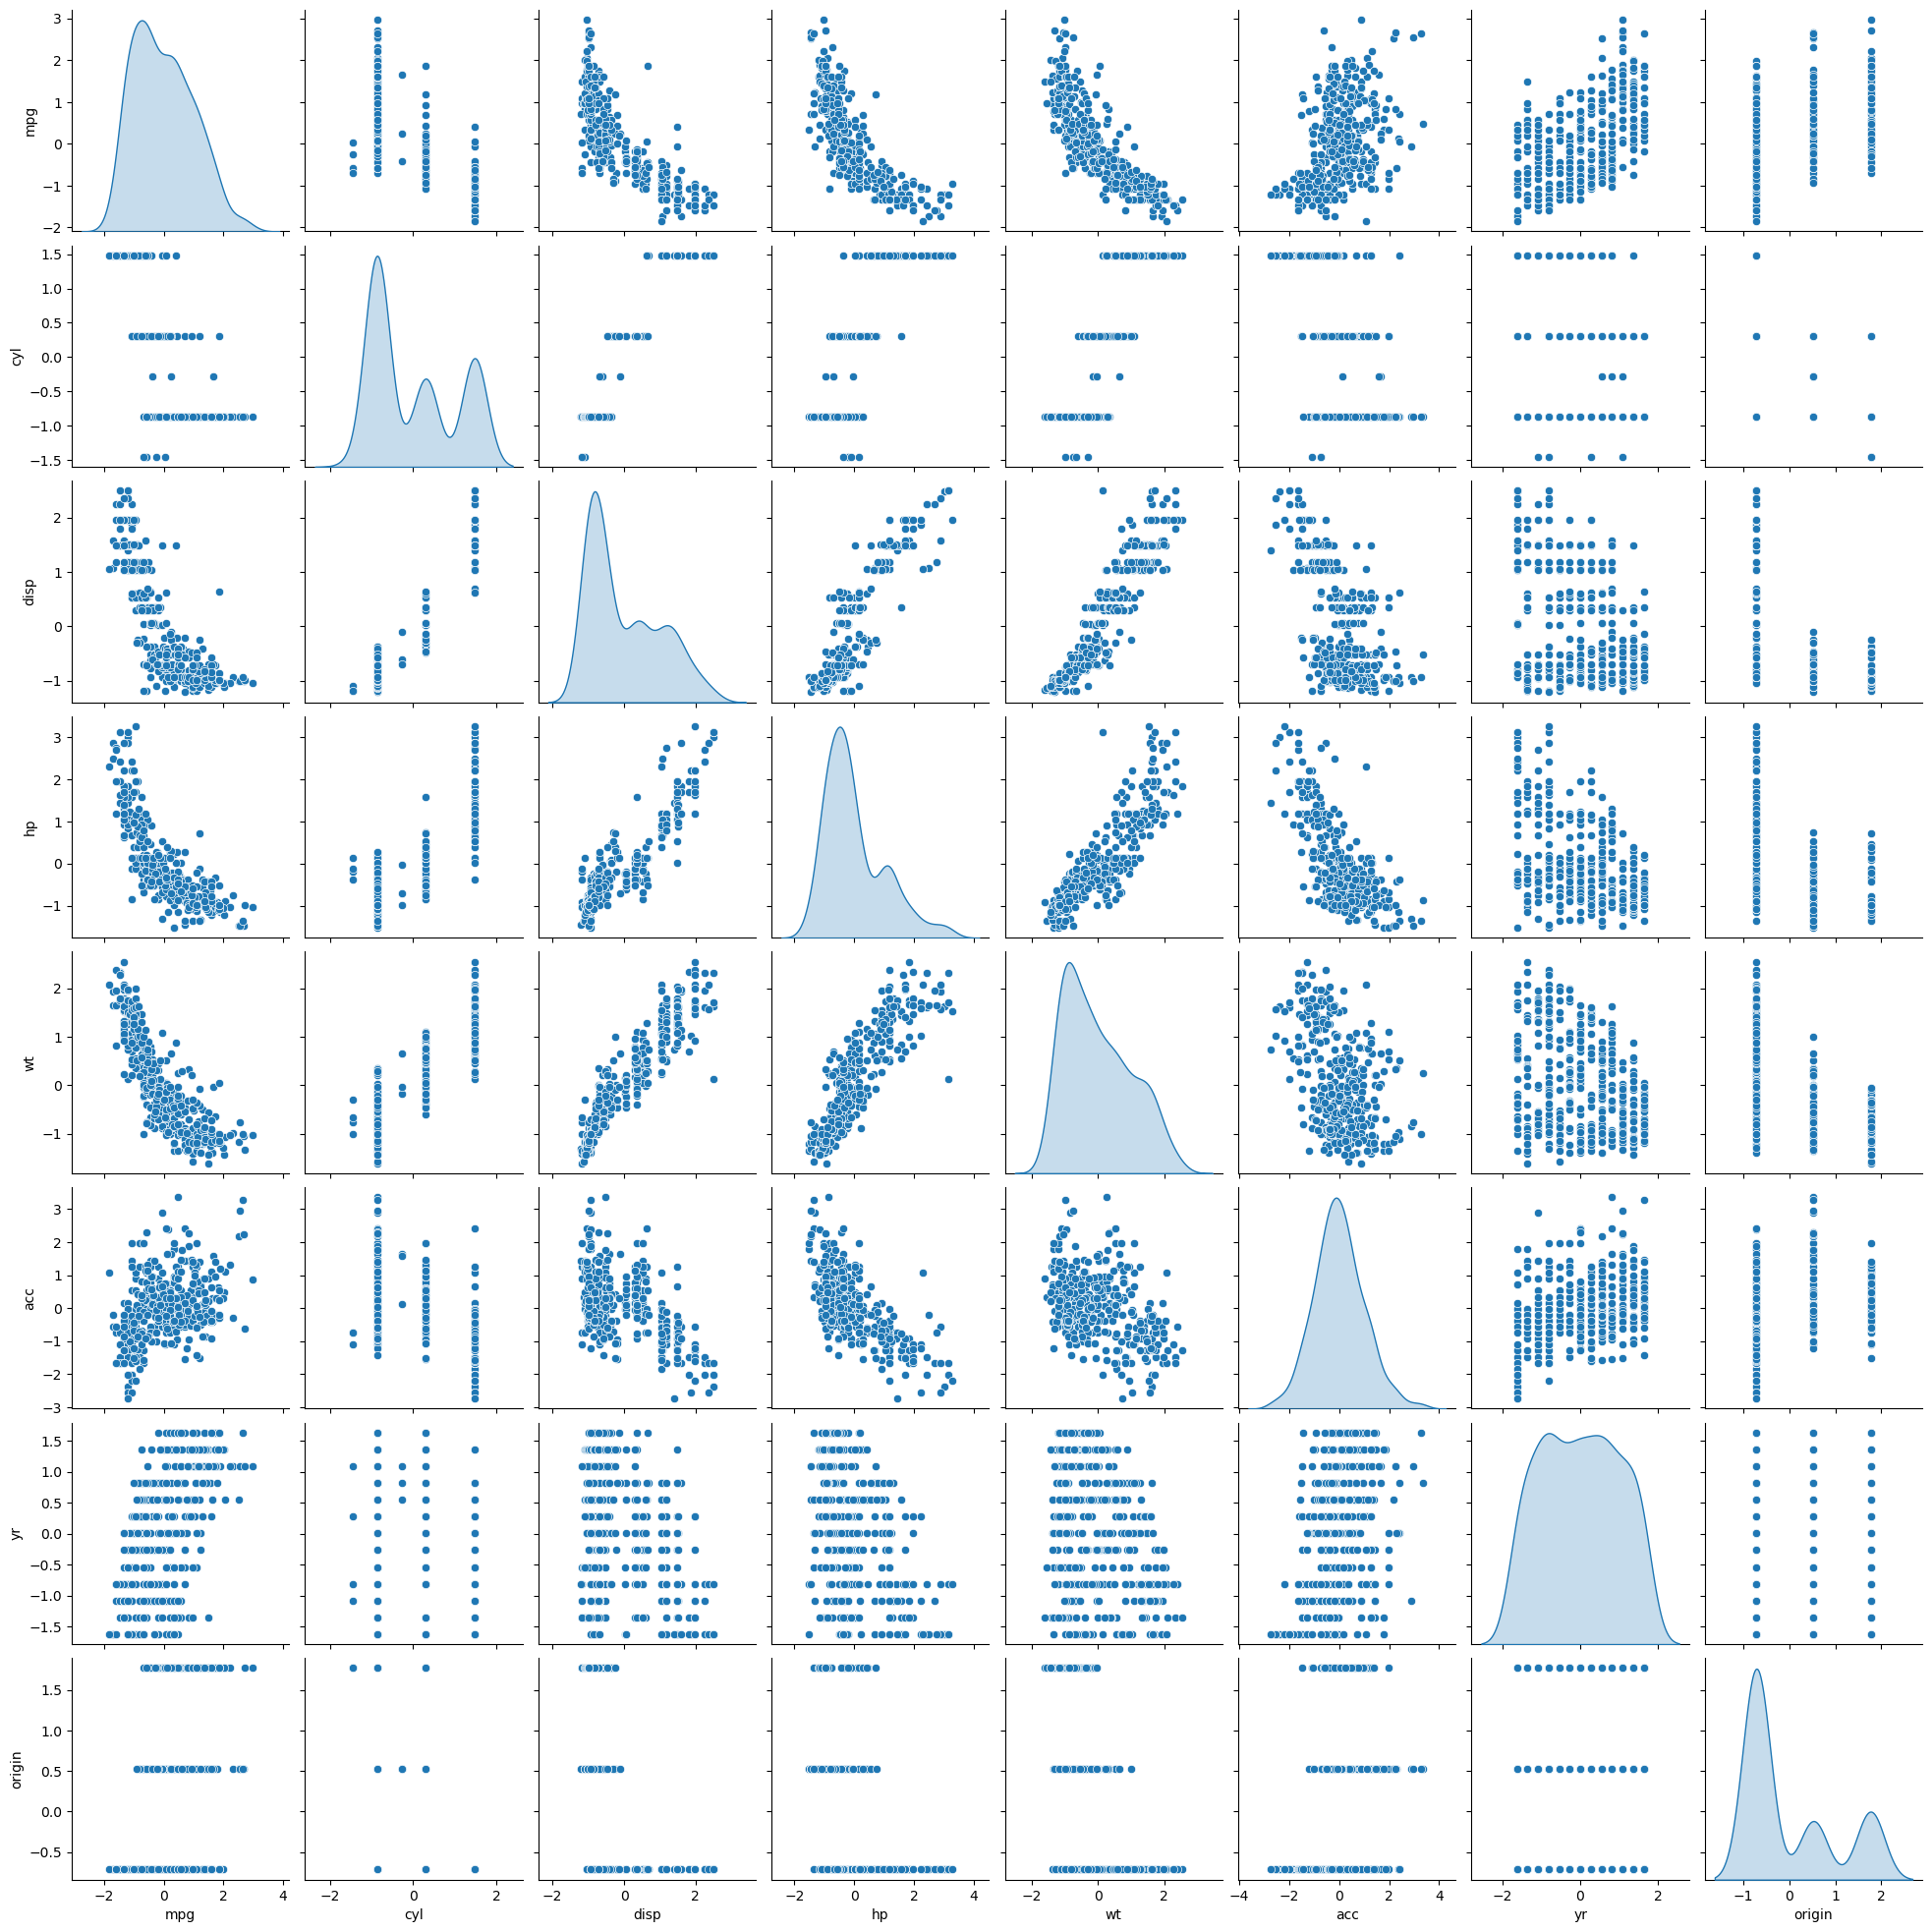

In [359]:
X_Scaled=X.apply(zscore)
sns.pairplot(X_Scaled,diag_kind='kde')

In [360]:
X_Scaled.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
5,-1.083498,1.483947,2.244637,2.433030,1.607198,-2.011120,-1.625315,-0.716641
6,-1.211785,1.483947,2.483848,3.005320,1.622523,-2.374052,-1.625315,-0.716641
7,-1.211785,1.483947,2.349890,2.875254,1.573013,-2.555517,-1.625315,-0.716641
8,-1.211785,1.483947,2.493416,3.135386,1.706218,-2.011120,-1.625315,-0.716641
9,-1.083498,1.483947,1.871469,2.224924,1.028406,-2.555517,-1.625315,-0.716641


In [378]:
#Finding optimal no. of clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
sum_squared_dist = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X_Scaled)
    sum_squared_dist.append(km.inertia_)

print(sum_squared_dist)

[1557.7707588149383, 1170.3077985494647, 968.1091493182446, 815.2102262928399, 739.0148962507047, 691.6066812587208, 625.3195244831721, 583.2856340526723, 545.1399172750454]


In [369]:
!pip install --upgrade kneed

B. Plot a visual and find elbow point.

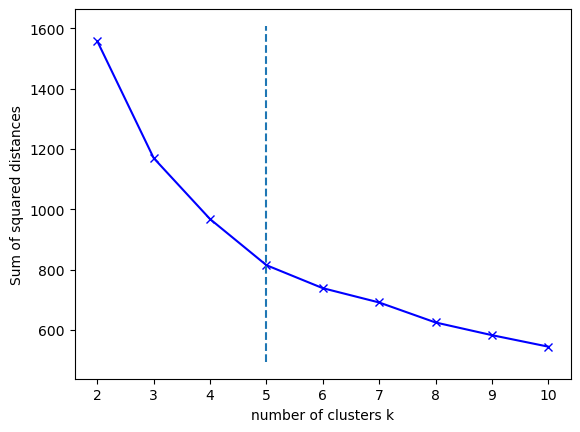

In [384]:
y_new = sum_squared_dist
x_new = range(2, len(y_new)+2)

from kneed import KneeLocator
kn = KneeLocator(x_new, y_new, curve='convex', direction='decreasing')

plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x_new, y_new, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

C. On the above visual, highlight which are the possible Elbow points

From the above graph, we see that there are two elbow points i.e., 3 and 5 clusters. 

D. Train a K-means clustering model once again on the optimal number of clusters. 

In [388]:
# 3 clusters
km3 = KMeans(n_clusters=3).fit(X)

E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

In [390]:
df['Labels_3'] = km3.labels_

F. Plot a visual and color the datapoints based upon clusters.

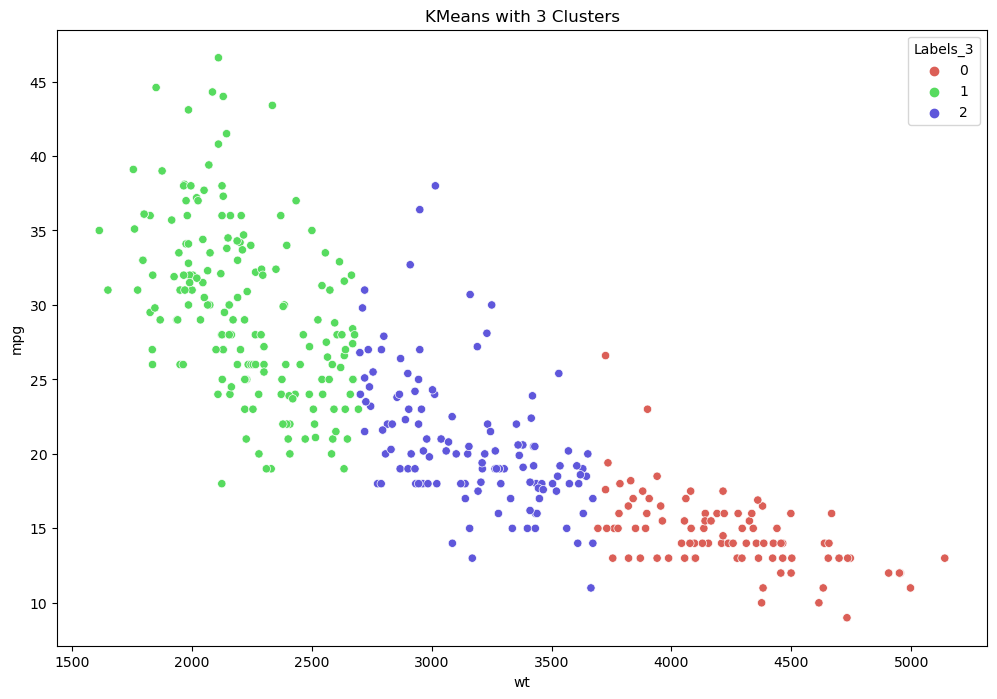

In [391]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = df['wt'], y = df['mpg'], hue=df['Labels_3'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [392]:
Clust3 = df.groupby(['Labels_3'])
Clust3.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
Labels_3,,,,,,,,
0,14.635556,7.866667,344.144444,157.811111,4236.322222,13.463333,74.011111,1.011111
1,29.651667,4.038889,107.208333,77.166667,2222.827778,16.334444,76.711111,2.055556
2,20.789344,5.819672,212.614754,105.401639,3162.581967,15.904098,76.352459,1.286885


In [393]:
df.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels_3
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,0
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,0
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,0
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,0
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,0


<Axes: xlabel='wt', ylabel='mpg'>

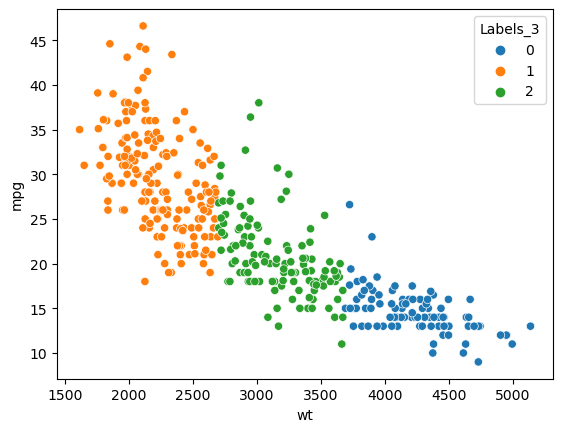

In [394]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='Labels_3',palette='tab10')

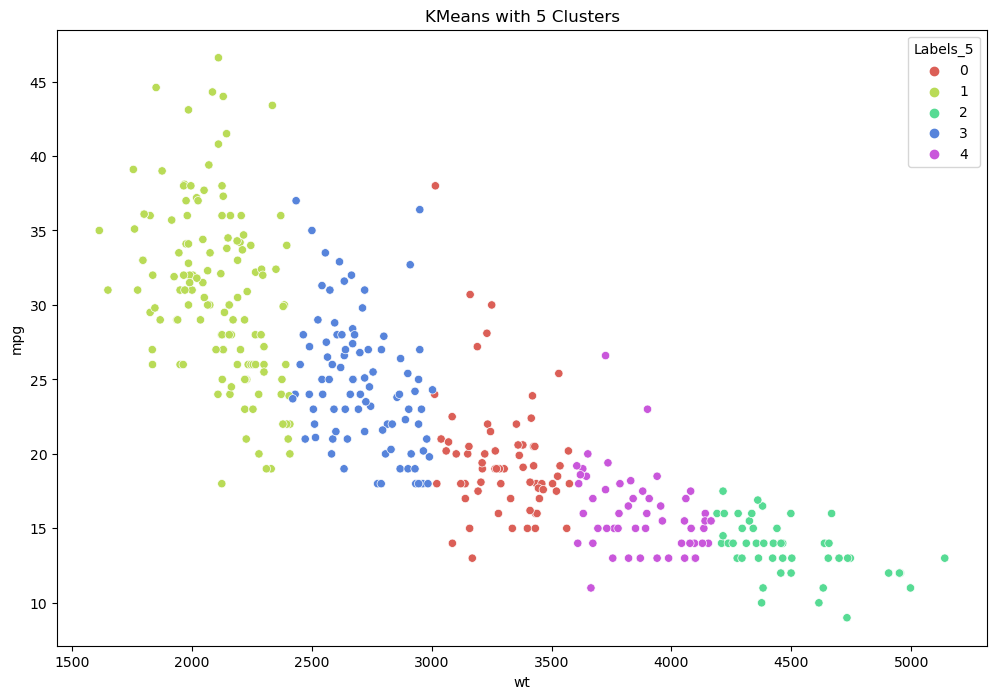

In [395]:
# 5 clusters
km5 = KMeans(n_clusters=5).fit(X)

df['Labels_5'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = df['wt'], y = df['mpg'], hue=df['Labels_5'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

In [396]:
Clust5 = df.groupby(['Labels_5'])
Clust5.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels_3
Labels_5,,,,,,,,,
0,19.704615,6.261538,239.461538,106.292308,3300.553846,16.238462,75.969231,1.138462,2.000000
1,30.788889,3.985185,98.337037,72.748148,2105.392593,16.631852,76.600000,2.170370,1.000000
2,13.602083,8.000000,368.833333,174.083333,4497.958333,12.791667,73.104167,1.000000,0.000000
3,24.736264,4.571429,147.505495,94.714286,2716.120879,15.581319,77.164835,1.637363,1.505495
4,16.030189,7.547170,306.452830,136.735849,3875.094340,14.330189,74.981132,1.018868,0.415094


In [397]:
df.head(10)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels_3,Labels_5
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1,2,0
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1,0,4
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1,2,0
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1,2,0
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1,2,0
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,0,2
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,0,2
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,0,2
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,0,2
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1,0,4


<Axes: xlabel='wt', ylabel='mpg'>

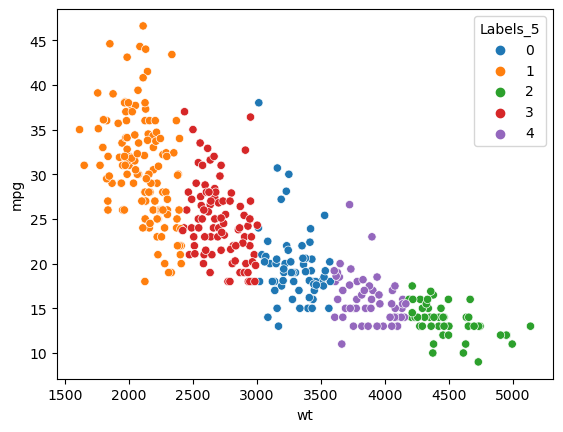

In [398]:
sns.scatterplot(data=df,x='wt',y='mpg',hue='Labels_5',palette='tab10')

<Axes: xlabel='hp', ylabel='mpg'>

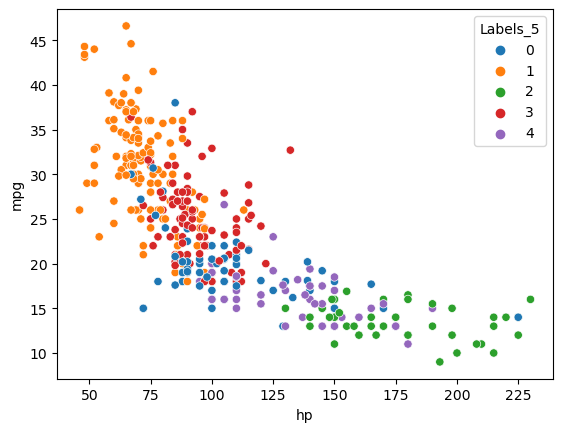

In [399]:
sns.scatterplot(data=df,x='hp',y='mpg',hue='Labels_5',palette='tab10')

G. Pass a new DataPoint and predict which cluster it belongs to

In [400]:
km5.predict([[15,7,1500,120,3500,10,50,2]])[0]

4

# Part B

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

# 1. Data Understanding & Cleaning:

A. Read ‘vehicle.csv’ and save as DataFrame.

In [415]:
vehicle_data = pd.read_csv('vehicle.csv')

In [416]:
vehicle_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [417]:
vehicle_data.shape

(846, 19)

In [418]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

B. Check percentage of missing values and impute with correct approach. 

In [419]:
vehicle_data.isna().sum()/len(vehicle_data)*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [420]:
missing_values_cols=vehicle_data.columns[vehicle_data.isnull().any()]
vehicle_data[missing_values_cols].isnull().sum()

circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
dtype: int64

In [421]:
#replace missing variable('?') into null variable using numpy
vehicle_data = vehicle_data.replace(' ', np.nan)

In [422]:
#Replacing the missing values by median 
for i in vehicle_data.columns[:17]:
    median_value = vehicle_data[i].median()
    vehicle_data[i] = vehicle_data[i].fillna(median_value)

In [423]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [424]:
# Again check data information
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

Now, there are no missing values in the dataset.
Also, we see that the class variable is of "Object" Datatype. So, let's convert it into Category.

C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 

In [425]:
vehicle_data['class']=vehicle_data['class'].astype('category')

<Axes: ylabel='class'>

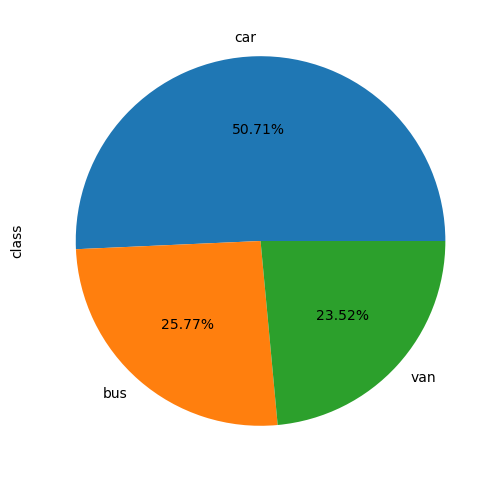

In [426]:
vehicle_data['class'].value_counts().plot(kind='pie',figsize=(11, 6),autopct='%1.2f%%')

From the above graph, we infer that there is an imbalance in the dataset where 50% of vehicle class belongs to "Car"

In [427]:
#Encoding of categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
vehicle_data['class']=labelencoder_X.fit_transform(vehicle_data['class'])

In [428]:
vehicle_data['class'].value_counts()

1    429
0    218
2    199
Name: class, dtype: int64

We have encoded the class variable
1 = Car, 0 = Bus, 2 = Van

D. Check for duplicate rows in the data and impute with correct approach.

In [429]:
vehicle_data.duplicated().sum()

0

There are no duplicates in the dataset.

# 2. Data Preparation

A. Split data into X and Y. [Train and Test optional]

In [430]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, KFold

In [431]:
#independent and dependent variables
X=vehicle_data.iloc[:,0:18]
y = vehicle_data.iloc[:,18]

B. Standardize the Data.

In [432]:
sc = StandardScaler()
X = sc.fit_transform(X)

# 3. Model Building

A. Train a base Classification model using SVM

In [436]:
clf = SVC()
clf.fit(X, y)
prediction = clf.predict(X)

B. Print Classification metrics for train data.

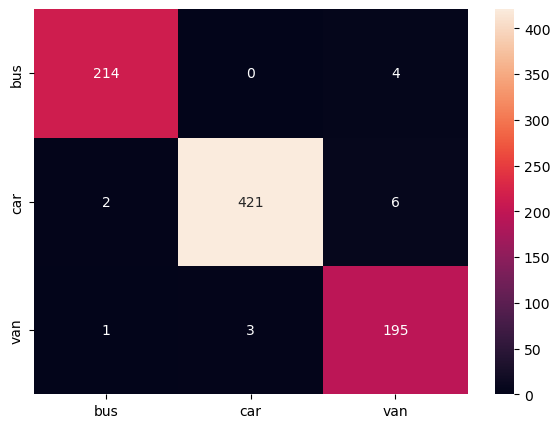

In [437]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
conf_mat = confusion_matrix(y, prediction)
df_cm = pd.DataFrame(conf_mat, index = [i for i in ["bus","car","van"]],
                  columns = [i for i in ["bus","car","van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [438]:
print(classification_report(y,prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       218
           1       0.99      0.98      0.99       429
           2       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



C. Apply PCA on the data with 10 components. 

In [283]:
pca=PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [284]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [285]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [286]:
print(pca.explained_variance_ratio_)

[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


D. Visualize Cumulative Variance Explained with Number of Components. 
E. Draw a horizontal line on the above plot to highlight the threshold of 90%

In [287]:
#percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(pca.explained_variance_ratio_)

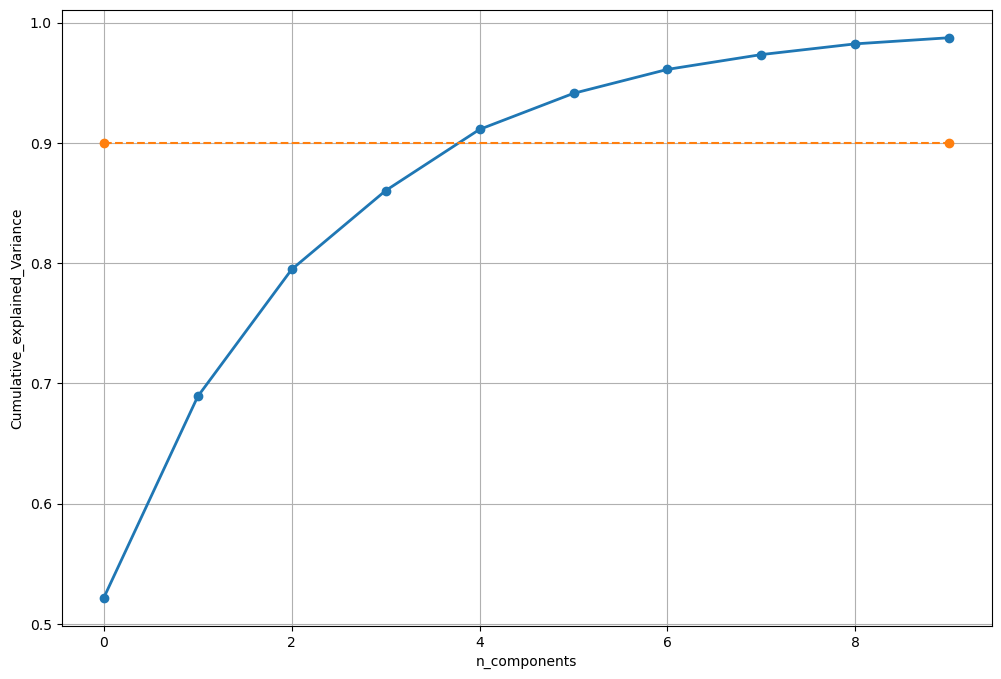

In [288]:
plt.figure(1,figsize=(12,8))
plt.clf()
plt.plot(cum_var_explained,linewidth=2,marker='o')
plt.plot((0,9),(0.9,0.9),'--',marker='o')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_Variance')
plt.show()

From the above graph, we infer that minimum components with 90% variance is 4. 

F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

In [291]:
pca_data=PCA(n_components=4)
new_pca = pca_data.fit_transform(X)

G. Train SVM model on components selected from above step. 

In [292]:
clf.fit(new_pca,y)

SVC()

In [293]:
pred_svm = clf.predict(new_pca)

H. Print Classification metrics for train data of above model and share insights. 

In [294]:
print(classification_report(y,pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.66      0.74       218
           1       0.83      0.90      0.86       429
           2       0.67      0.73      0.70       199

    accuracy                           0.80       846
   macro avg       0.79      0.76      0.77       846
weighted avg       0.80      0.80      0.79       846



We see that the model performance has reduced from 98% to 80% however reducing overfitting of the data. Now, let's tune some parameters to improve the performance.  

# 4. Performance Improvement:

A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. 

In [295]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
clf_1 = GridSearchCV(svc, parameters)
clf_1.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [296]:
clf_1.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})>

B. Share best Parameters observed from above step.

In [297]:
clf_1.best_params_

{'C': 10, 'kernel': 'rbf'}

In [298]:
pred_grid = clf_1.predict(X)

C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights.

In [299]:
print(classification_report(y,pred_grid))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       429
           2       0.98      0.99      0.99       199

    accuracy                           0.99       846
   macro avg       0.99      0.99      0.99       846
weighted avg       0.99      0.99      0.99       846



1. From the above report, we see that the SVM model has classified most of the vehicles correctly with less error, high accuracy and precision. 
2. Model performance has improved from 80%(after PCA) to 99%(after parameter tuning). 

# 5. Data Understanding & Cleaning

A. Explain pre-requisite/assumptions of PCA

1. Dataset has high dimensions.  
2. Multicollinearity exists between the independent features in the Dataset.

B. Explain advantages and limitations of PCA.

Advantages of PCA-
1. PCA is used to transform high dimensional dataset to lower dimensions. 
2. PCA highlights the most important features by reducing the noise and complexity of the data.
3. Avoids Overfitting of data.
4. Easy to implement. 

Disadvantages of PCA-
1. Loss of information and details when reducing the dimensionality of the data.
2. Sensitive to scaling and outliers